### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [2]:
import numpy as np
m = np.arange(12).reshape((3,4))
num_rows, num_cols = m.shape
print (num_rows, num_cols)

print(np.mean(m))
print(np.mean(m, axis=0))
print(np.mean(m, axis=1))


3 4
5.5
[4. 5. 6. 7.]
[1.5 5.5 9.5]


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [13]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

#metodo 1
print("METODO 1")
print(np.outer(u,v))

#metodo 2
print("METODO 2")
print(np.array([u[i]*v[j] for i in range(4) for j in range(4)]).reshape(4,4))

#metodo 3
print("METODO 3")
u[:, np.newaxis]*v

METODO 1
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
METODO 2
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
METODO 3


array([[ 2,  4,  6,  8],
       [ 6, 12, 18, 24],
       [10, 20, 30, 40],
       [14, 28, 42, 56]])

3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [25]:
matrix=np.random.uniform(low=0, high=0.1, size=(60)).reshape(10,6)

print(matrix)



[[0.0960928  0.00188031 0.03825251 0.0203169  0.08030583 0.09209656]
 [0.00678269 0.061743   0.02736932 0.04387245 0.02486363 0.01714702]
 [0.0966156  0.09574259 0.01493757 0.01345472 0.01744405 0.0064845 ]
 [0.08162502 0.03451926 0.06803807 0.00911094 0.09559956 0.03544831]
 [0.05267233 0.09375406 0.02188056 0.0983771  0.09585683 0.00546726]
 [0.04725779 0.06452232 0.03557215 0.07524224 0.06710025 0.07780731]
 [0.04496669 0.00216967 0.09355734 0.01741871 0.06103935 0.00128067]
 [0.05770663 0.04846947 0.0780159  0.072292   0.09287582 0.0558309 ]
 [0.05201474 0.04255758 0.03380604 0.01227389 0.04837992 0.09653172]
 [0.06976135 0.09663125 0.05465343 0.09743378 0.03371431 0.01067697]]


4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

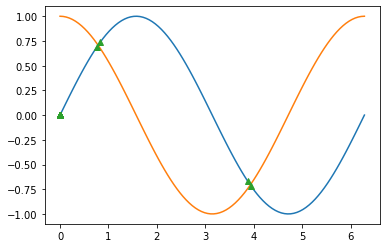

In [4]:
import math
import matplotlib.pyplot as plt

m=np.linspace(0,2*math.pi,100)
print(m)
m1=m[::10]
print("\n",m1)
m2=m[::-1]
print("\n",m2)


filt=(abs(np.sin(m)-np.cos(m)))<0.1
m3=m.copy()
m3[filt]=0
print(m3)

plt.plot(m,np.sin(m),m,np.cos(m),m-m3,np.sin(m-m3),"^")

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [12]:
r=np.arange(1,11)
c=np.arange(1,11)

matrice=np.outer(r,c)
print("tabellina del dieci:\n",matrice,"\n")

traccia = np.trace(matrice)
print ("traccia", traccia)

antidiag = np.fliplr(matrice).diagonal()
print ("antidiagonale", antidiag)

diagoffset = matrice.diagonal(1)
print ("diagonal + 1", diagoffset)

tabellina del dieci:
 [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]] 

traccia 385
antidiagonale [10 18 24 28 30 30 28 24 18 10]
diagonal + 1 [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [ ]:
dis=np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
dist=np.reshape(dis,(len(dis),1))
mdist=np.tile(dist,(1,len(dis)))

tab=abs(dis-mdist)
print(tab)

print(tab*1.0934)

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [12]:


numbers=np.arange(1,100)

def prime(x):
    if x==1: return True
    for i in range(1,x):
        t=x-i
        if t==1:
            return True
        elif x%t==0:
            return False

            
foo = np.vectorize(prime)
mask=(foo(numbers))
f_a=numbers[mask]

print('Funzione: ',f_a)
%timeit numbers[foo(numbers)]
loop=numbers.copy()
def maschera(loopn):
    for n in range(2,int(pow(len(loopn),1/2))):
        mask_n=(np.logical_or(loopn%n!=0,loopn==n))
        loopn=loopn[mask_n]
    return loopn
    
print('Mask: ',maschera(loop))
%timeit maschera(loop)
def eratostene(erat):
    i=1
    while erat[i]<pow(len(numbers),1/2):
        masker=(np.logical_or(erat%erat[i]!=0,erat==erat[i]))
        erat=erat[masker]
        i+=1
    return(erat)

print('Eratostene: ',eratostene(numbers))    
%timeit eratostene(numbers)


#Timeit scala linearmente con N provandone alcuni





Funzione:  [  1   2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53  59
  61  67  71  73  79  83  89  97 101 103 107 109 113 127 131 137 139 149
 151 157 163 167 173 179 181 191 193 197 199 211 223 227 229 233 239 241
 251 257 263 269 271 277 281 283 293 307 311 313 317 331 337 347 349 353
 359 367 373 379 383 389 397 401 409 419 421 431 433 439 443 449 457 461
 463 467 479 487 491 499 503 509 521 523 541 547 557 563 569 571 577 587
 593 599 601 607 613 617 619 631 641 643 647 653 659 661 673 677 683 691
 701 709 719 727 733 739 743 751 757 761 769 773 787 797 809 811 821 823
 827 829 839 853 857 859 863 877 881 883 887 907 911 919 929 937 941 947
 953 967 971 977 983 991 997]
61.3 ms ± 829 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Mask:  [  1   2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53  59
  61  67  71  73  79  83  89  97 101 103 107 109 113 127 131 137 139 149
 151 157 163 167 173 179 181 191 193 197 199 211 223 227 229 233 239 241
 251 2

**N.B. the following exercises are meant to be solved only if you are familiar with the numpy random library. If not you can skip them (postponed for one of the next exercise sessions)**


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.